# PCA

Compute PCA for gait data from wireless sensor.

**April 30; May 3, 8-9, 30-31; August 20; December 21**

In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
import os.path

In [4]:
import pandas as pd

In [5]:
from sklearn.decomposition import PCA

***

Read in data:

In [6]:
datafile = os.path.join('..', 'data', 'processed', 'combined_cond_ranges.csv')
data = pd.read_csv(datafile)
X = data.iloc[:, 1:7].values
y = data.iloc[:, 7].values
target_names = ['Normal', 'Abnormal']

In [7]:
data.head()

Condition        GX        GY        GZ        AX        AY        AZ  \
0          1  0.084961  0.023438  0.219727  0.052735  0.609375  0.158203   
1          1  0.603516  0.178711  1.031250  0.149414  1.986328  0.304688   
2          1  0.008789  0.005860  0.005860  0.002929  0.017578  0.023437   
3          1  0.029297  0.005859  0.026367  0.002930  0.052734  0.164063   
4          1  0.219726  0.055664  0.427734  0.038085  0.729492  0.175781   

   Label  
0      1  
1      1  
2      1  
3      1  
4      1

In [8]:
data.shape

(319, 8)

Center the data but forego scaling to unit variance, as all values have identical units of voltage. 

In [7]:
X_ctr = X - np.mean(X, axis=0)

In [8]:
pca = PCA(n_components=2)
pca.fit(X_ctr)
X_r = pca.transform(X_ctr)
print('explained variance ratio (first two components): %s' 
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [0.46467186 0.36357957]


In [9]:
xvector = pca.components_[0]
yvector = pca.components_[1]

In [10]:
feature_names = list(data.columns.values[1:7])

<Figure size 432x288 with 0 Axes>

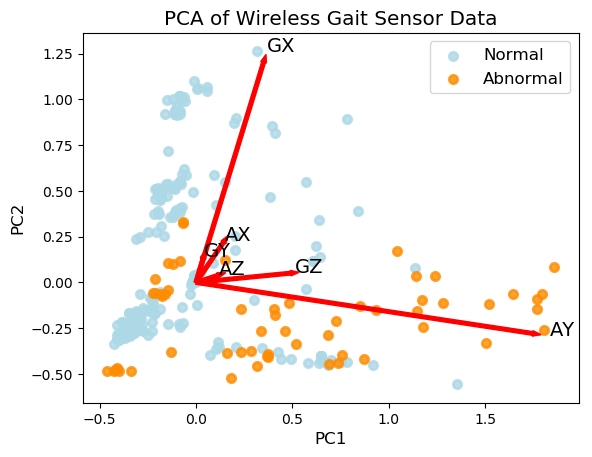

In [11]:
plt.clf()
plt.style.use('default')
plt.figure()
colors = ['lightblue', 'darkorange']
lw_ = 2
for i in range(len(xvector)):
    plt.arrow(0, 0, xvector[i]*max(X_r[:,0]), yvector[i]*max(X_r[:,1]), 
              color='r', width=0.02, head_width=0.03)
    plt.text(xvector[i]*max(X_r[:,0])*1.05, yvector[i]*max(X_r[:,1])*1.05, 
             feature_names[i], color='k', fontsize=14)
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, 
                alpha=0.8, lw=lw_, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1, fontsize='large')
plt.xlabel('PC1', fontsize='large')
plt.ylabel('PC2', fontsize='large')
plt.title('PCA of Wireless Gait Sensor Data', fontsize='x-large')
filename = os.path.join('..', 'results', 'PCA.png')
plt.savefig(filename, dpi=300)
plt.show()